## 회귀



In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt
from IPython.display import Image



### 다음과 같은 종속 변수 Y와 두 개의 독립 변수 X1,X2를 갖고 있는 데이터가 있습니다. Regressing Tree를 통해 Y를 예측하고자 할 때, 처음으로 분할 되는 변수 및 분할 point를 찾아 주세요.

In [14]:
#Image("C:/Users/kdh2/Desktop/세션강의자료/2.png")
df = pd.DataFrame([[4,6,4],[6,8,10],[10,3,8]],columns=['X1','X2','Y'])
df

,X1,X2,Y
0,4,6,4
1,6,8,10
2,10,3,8


In [15]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
DT = DecisionTreeRegressor()
DT.fit(df[['X1','X2']],df['Y'])

#X = np.array([[4, 6],[6, 8],[10, 3]])
#Y = np.array([4, 10, 8])
#Y.reshape(1, -1)
#DT.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

[Text(133.92000000000002, 181.2, 'X[0] <= 5.0\nentropy = 6.222\nsamples = 3\nvalue = 7.333'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 1\nvalue = 4.0'),
 Text(200.88000000000002, 108.72, 'X[1] <= 5.5\nentropy = 1.0\nsamples = 2\nvalue = 9.0'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = 8.0'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = 10.0')]

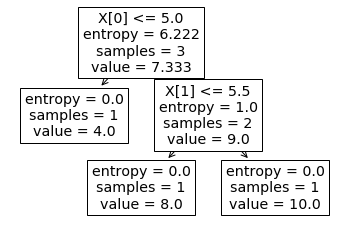

In [16]:
plot_tree(DT)

##### 답
##### 처음으로 분할되는 변수와 point : X[0] = X1 <= 5.0 을 기준으로 검사한다.
##### 두번째로 분할되는 변수와 point: X[1] = X2 <= 5.5 을 기준으로 검사한다.

In [17]:
from sklearn.datasets import load_boston
boston = load_boston()
#보스톤 데이터셋은 범죄율, 강의 인접 유무, 세금 등 13개의 변수를 가지고 있으며, 주택 가격을 라벨 데이터로 가지고 있습니다

### <특징 데이터>
CRIM: 범죄율<br>
INDUS: 비소매상업지역 면적 비율<br>
NOX: 일산화질소 농도<br>
RM: 주택당 방 수<br>
LSTAT: 인구 중 하위 계층 비율<br>
B: 인구 중 흑인 비율<br>
PTRATIO: 학생/교사 비율<br>
ZN: 25,000 평방피트를 초과 거주지역 비율<br>
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0<br>
AGE: 1940년 이전에 건축된 주택의 비율<br>
RAD: 방사형 고속도로까지의 거리<br>
DIS: 직업센터의 거리<br>
TAX: 재산세율<br>

In [18]:
data = boston.data
label = boston.target
columns = boston.feature_names
label

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [19]:
data = pd.DataFrame(data, columns = columns)
label=pd.DataFrame(label,columns=['label'])

data.head()
label

,label
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [21]:
from sklearn.model_selection import train_test_split

#변수를 split 해주세요
X_train, X_test, y_train, y_test = train_test_split(data,label)

### DecisionTreeRegressor와 DecisionTreeClassifier를 쓰는 상황을 구분하여 작성 해주세요

- DecisionTreeRegressor 
    : 타겟변수가 연속형일 때 / 의사결정나무의 terminal node에는 타겟변수인 연속형 값들이 출력된다. / 기준 매개변수 기본값 "mse" / 회귀 문제를 해결할 때 사용 / 예) 마취과다로 인해 얼마나 많은 사람이 죽을지를 예측
    
    
- DecisionTreeClassifier 
    : 타겟변수가 범주형일때 / 의사결정나무의 terminal node에는 타겟변수인 범주형 값들이 출력된다. / 기준 매개변수 기본값 "gini" / 분류 문제를 해결할 때 사용 / 예) 대출 승인을 받을지 여부 예측

In [22]:
X_train['RM']

91     6.405
498    6.019
244    5.593
423    6.103
319    6.113
298    6.345
456    5.976
146    5.628
132    6.372
275    6.854
343    6.696
480    6.242
19     5.727
11     6.009
95     6.625
447    6.251
90     6.417
156    5.272
96     6.163
458    6.301
138    5.857
430    6.348
81     6.619
83     6.167
26     5.813
354    5.663
277    6.826
426    5.837
128    6.431
274    6.758
       ...  
151    5.404
308    6.635
50     5.963
284    7.088
13     5.949
106    5.836
114    6.254
170    5.875
311    6.122
390    5.713
479    6.229
223    6.618
4      7.147
175    6.546
43     6.211
344    6.874
33     5.701
335    6.037
136    5.942
400    5.987
25     5.599
78     6.232
467    6.003
58     6.145
309    5.972
419    6.824
502    6.120
117    6.021
453    7.393
104    6.167
Name: RM, Length: 379, dtype: float64

### Decision Tree Regressor


#### 1) x 변수로 'RM' 변수를, y 변수는 주택 가격으로 하여 회귀트리모델을 돌려주세요.<br>

In [33]:
#1) 트리의 max_depth는 5로 지정해주세요
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=5)
#fit()을 이용하여 모델 학습
tree_fit = tree_reg.fit(X_train['RM'].values.reshape((-1,1)),y_train)
print(tree_fit)

#예측값
pred = tree_fit.predict(X_test['RM'].values.reshape((-1,1)))
print(pred)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
[33.19444444 19.54540541 33.19444444 19.54540541 19.54540541 19.54540541
 17.0125     19.54540541 17.0125     19.54540541 25.96571429 50.
 19.54540541 19.54540541 19.54540541 17.0125     19.54540541 17.0125
 49.4        19.54540541 44.675      17.0125     35.3        17.0125
 25.96571429 17.0125     29.8625     17.0125     25.96571429 19.54540541
 17.0125     17.0125     25.96571429 17.0125     25.96571429 19.54540541
 19.54540541 19.54540541 19.54540541 19.54540541 14.26666667 19.54540541
 19.54540541 48.4625     19.54540541 46.75       25.96571429 19.54540541
 25.96571429 20.71666667 19.54540541 11.03333333 25.96571429 48.4625
 35.2    

#### 2) R<sup>2</sup> 으로 회귀 모델이 데이터를 잘 표현하는지 확인해주세요.
(R<sup>2</sup>값이 1에 가까울수록 회귀 모델이 데이터를 잘 표현한다는 것을 의미합니다.)

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test , pred)

0.38664675018203365

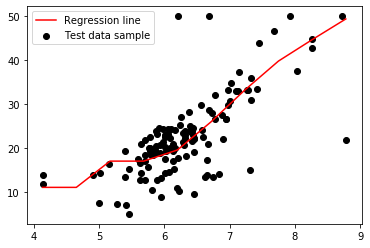

In [37]:
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 10)
line_y = tree_reg.predict(line_x.reshape((-1, 1)))

plt.scatter(X_test['RM'].values.reshape((-1, 1)), y_test, c = 'black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

#### 변수 하나로는 R<sup>2</sup>값이 높지 않은 것을 확인하였습니다.
#### 3) 13개의 변수를 모두 사용해 결정 트리 회귀 모델을 사용해 보세요. 

In [47]:
#파라미터 조정 자유입니다. 
tree_reg2=DecisionTreeRegressor(max_depth=5)
#fit()을 이용하여 모델 학습
tree_fit2 = tree_reg.fit(X_train,y_train)
print(tree_fit)

#예측값
pred2 = tree_fit2.predict(X_test)
print(pred)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
[33.19444444 19.54540541 33.19444444 19.54540541 19.54540541 19.54540541
 17.0125     19.54540541 17.0125     19.54540541 25.96571429 50.
 19.54540541 19.54540541 19.54540541 17.0125     19.54540541 17.0125
 49.4        19.54540541 44.675      17.0125     35.3        17.0125
 25.96571429 17.0125     29.8625     17.0125     25.96571429 19.54540541
 17.0125     17.0125     25.96571429 17.0125     25.96571429 19.54540541
 19.54540541 19.54540541 19.54540541 19.54540541 14.26666667 19.54540541
 19.54540541 48.4625     19.54540541 46.75       25.96571429 19.54540541
 25.96571429 20.71666667 19.54540541 11.03333333 25.96571429 48.4625
 35.2    

In [48]:
#r2 score
print(r2_score(y_test,pred2))

0.777951313223322


# 분류

In [1]:
import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn

import matplotlib.pyplot as plt

adult_path = join('C:/Users/yeongeunkim/Desktop/github/boazhappy repository/16기 분석/3Week', 'adult_data.csv')
column_path = join('C:/Users/yeongeunkim/Desktop/github/boazhappy repository/16기 분석/3Week', 'adult_names.txt')
adult_columns = list()
for l in open(column_path):
    adult_columns = l.split()

In [4]:
data = pd.read_csv(adult_path, names = adult_columns)
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [5]:
label = data['income']
del data['income']
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [6]:
label

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
5        <=50K
6        <=50K
7         >50K
8         >50K
9         >50K
10        >50K
11        >50K
12       <=50K
13       <=50K
14        >50K
15       <=50K
16       <=50K
17       <=50K
18       <=50K
19        >50K
20        >50K
21       <=50K
22       <=50K
23       <=50K
24       <=50K
25        >50K
26       <=50K
27        >50K
28       <=50K
29       <=50K
         ...  
48812    <=50K
48813     >50K
48814    <=50K
48815     >50K
48816     >50K
48817    <=50K
48818    <=50K
48819    <=50K
48820    <=50K
48821    <=50K
48822     >50K
48823    <=50K
48824    <=50K
48825    <=50K
48826     >50K
48827    <=50K
48828    <=50K
48829    <=50K
48830    <=50K
48831    <=50K
48832    <=50K
48833    <=50K
48834    <=50K
48835    <=50K
48836    <=50K
48837    <=50K
48838    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [7]:
data.shape

(48842, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [6]:
# Pandas get_dummies 함수를 사용해 범주형 변수를 One-Hot Encoding하고, 라벨 데이터를 0,1 로 변경
data = pd.get_dummies(data)
label = label.map(lambda x : 0 if x =='>50K' else 1)
data
label.sum()

37155

## Cross Validation

In [7]:
from sklearn.model_selection import train_test_split

# (Train, Valid), Test 분할
X_train, X_test, y_train,y_test=train_test_split(data,label,test_size=0.2,random_state=785)

In [11]:
# Train, Valid 분할
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2,random_state=785)

In [12]:
#랜덤 포레스트로 모델을 학습시켜 주세요.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

RF = RandomForestClassifier()
RF.fit(X_train,y_train)
# Valid 데이터로 검증
y_pred = RF.predict(X_valid)
print("랜덤 포레스트 검증 데이터 정확도 : {:.2f}%".format(accuracy_score(y_valid,y_pred)*100))

# Test 데이터로 모델 평가
y_pred = RF.predict(X_test)
print("랜덤 포레스트 테스트 데이터 정확도 : {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

랜덤 포레스트 검증 데이터 정확도 : 84.08%
랜덤 포레스트 테스트 데이터 정확도 : 84.73%


## Parameter Tuning
간단히 GridSearchCV 함수를 사용해 랜덤 포레스트의 n_estimator, max_depth 파라미터 중 가장 좋은 파라미터 조합을 찾아보겠습니다.<br>
GridSearchCV 함수는 Sklearn의 model_selection 패키지에 있습니다.<br>

In [ ]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators':[100], 
    #n_estimators를 여러개로 주면 너무 느려서 한개로 했습니다. 여러개로 돌려보시고 더 높은 성능이 나오면 그것으로 해도 무방합니다
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

#위의 리스트 값말고 다른값들로 돌려보았을 때 괜찮은 값 있으면 변경하셔도 됩니다.

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
RF = RandomForestClassifier()
grid_cv=GridSearchCV(RF,params)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [68]:
from sklearn.model_selection import cross_val_score

# 위에서 나온 최적 하이퍼 파라미터로 모델을 학습시켜 주세요.

best = grid_cv.best_estimator_
best.fit(X_train,y_train)
pred = best.predict(X_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.8616


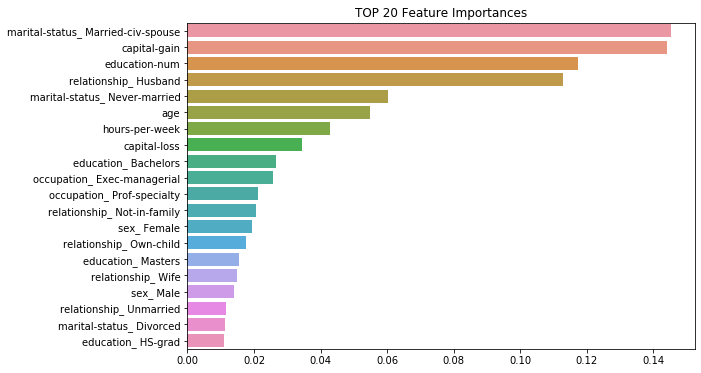

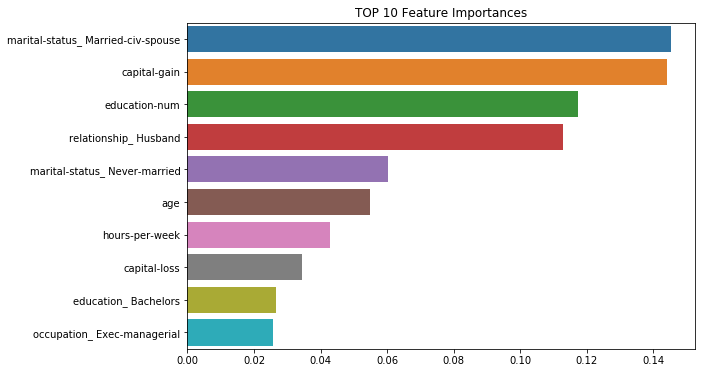

In [90]:
# 개별 feature들의 중요도를 시각화해주세요.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#best.feature_importances_ 
feature_importance = pd.Series(best.feature_importances_,index = X_train.columns) 
feature_20_importance = feature_importance.sort_values(ascending=False)[:20]
feature_10_importance = feature_importance.sort_values(ascending=False)[:10]

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title('TOP 20 Feature Importances')
sns.barplot(x=feature_20_importance, y=feature_20_importance.index) 
plt.show()

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 2)
plt.title('TOP 10 Feature Importances')
sns.barplot(x=feature_10_importance, y=feature_10_importance.index) 
plt.show()

#### 50개의 변수에 대한 200개의 관측치를 갖는 데이터 셋을 갖고 있다고 가정합시다. 랜덤 포레스트를 돌려 importance plot을 그리고 나서, 그 결과를 바탕으로 상위 10개의 변수를 이용하여 선형 회귀를 fit했다고 가정해봅시다. 이때 회귀 모델이 랜덤 포레스트에 비해 성능이 훨씬 안 좋았습니다. 이러한 결과가 도출된 이유(가능성)에 대해서 두 가지 이상 제시해주세요.
- feature importance가 높다는 것이 선형 관계가 있는 것은 아니기 때문에 선형 회귀 결과가 좋지 않을 수 있다.
- 오버피팅의 가능성이 있음

## Voting Ensemble

#### 1) 모델 불러오기 및 정의하기

In [8]:
from sklearn.ensemble import VotingClassifier

#원하는 모델 3개를 골라 VotingClassifier을 돌려주세요.
#저는 성능 상관없이 모델을 가져왔는데 부담없이 원하시는 모델을 돌려주시면 됩니다ㅎㅎ


In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
models=[('lgbm',LGBMClassifier()),
       ('xgbm',XGBClassifier()),
       ('svc',SVC(probability=True))]

soft_vote=VotingClassifier(models, voting='soft')
vote_cv=cross_validate(soft_vote,X_train,y_train,cv=5)

[16:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
soft_vote.fit(X_train,y_train)
vote_pred=soft_vote.predict(X_test)
print(accuracy_score(pred,y_test))

# 수고하셨습니다:)